### 사진학습의 문제점
1. 이미지마다 크기가 다르다.
 - 디렉토리에서 불러올 때 크기를 맞춘다. 
2. 레이블이 없다. 
 - 레이블링이 되어있다. 폴더명. 사람이 미리 분류를 해놓았음
 


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [3]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale = 1./255,
                                 rotation_range= 40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest')
valid_datagen=ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 : ',data_batch.shape)
    print('배피 레이블 크기 : ',labels_batch.shape)
    break

배치 데이터 크기 :  (20, 150, 150, 3)
배피 레이블 크기 :  (20,)


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       validation_data=valid_generator,
                       epochs=100,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6969 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 18s 181ms/step - loss: 0.6935 - accuracy: 0.4955 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6939 - accuracy: 0.4955 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/100
100/100 [==============================] - 18s 181ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6926 - accuracy: 0.5260 - val_loss: 0.6914 - val_accuracy: 0.5510
Epoch 6/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6934 - accuracy: 0.5285 - val_loss: 0.6909 - val_accuracy: 0.5350
Epoch 7/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6935 - accuracy: 0.5205 - val_loss: 0.6903 -

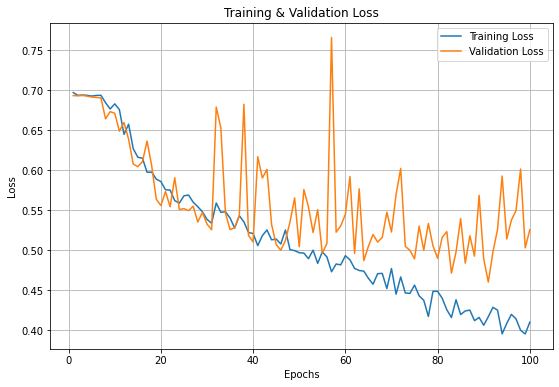

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()


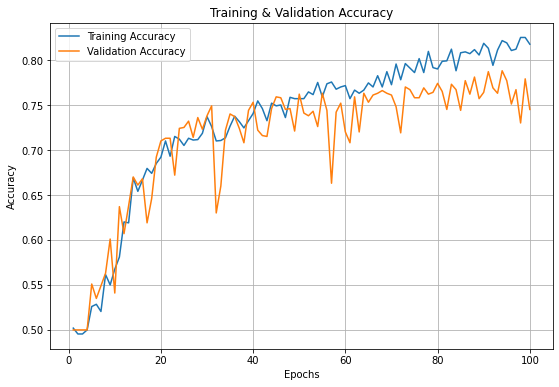

In [15]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_dandc.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [16]:
test_datagen=ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [17]:
loss,accuracy = model.evaluate(test_generator,steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 52ms/step - loss: 0.5783 - accuracy: 0.7450
Loss = 0.57832
Accuracy = 0.74500


In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

In [18]:
model.save('/content/drive/My Drive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')

In [19]:
from tensorflow.keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')

In [21]:
loss, accuracy = model_google.evaluate(test_generator,steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 56ms/step - loss: 0.5783 - accuracy: 0.7450
Loss = 0.57832
Accuracy = 0.74500
